In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
batch_size = 32

In [0]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
y_train = []
X_train = []
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q","R", "S", "T", "U", "V","W", "X", "Y", "Z", "del", "space", "nothing"]




In [0]:
for i in range(len(labels)):
  for j in range(1, 21):
    entry = "/" + labels[i] + str(j)
    img_path = "/content" + entry + ".jpg"
    img = Image.open(img_path)
    X_train.append(img_path)
    y_train.append(labels[i])

In [0]:
df = pd.DataFrame()
df["train"] = X_train
df["label"] = y_train

In [59]:
df

,train,label
0,/content/A1.jpg,A
1,/content/A2.jpg,A
2,/content/A3.jpg,A
3,/content/A4.jpg,A
4,/content/A5.jpg,A
...,...,...
575,/content/nothing16.jpg,nothing
576,/content/nothing17.jpg,nothing
577,/content/nothing18.jpg,nothing
578,/content/nothing19.jpg,nothing


In [0]:
data = ImageDataBunch.from_df(path="../", df=df, size=24)

In [61]:
data

ImageDataBunch;

Train: LabelList (464 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
A,A,A,A,A
Path: ..;

Valid: LabelList (116 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
J,W,M,D,F
Path: ..;

Test: None

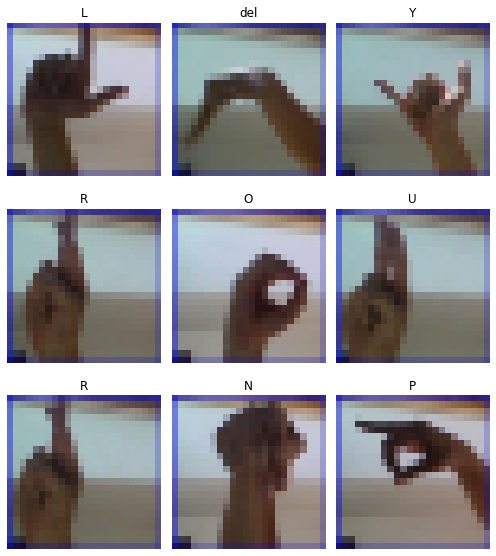

In [62]:
data.show_batch(rows=3, figsize=(7, 8))

In [63]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [64]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.541206,3.092609,0.801724,00:11
1,1.787199,3.942815,0.801724,00:10
2,1.154173,5.016724,0.836207,00:13
3,0.823391,4.375451,0.750000,00:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


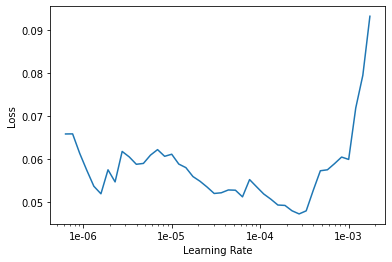

In [65]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(4, max_lr=slice(2e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.094350,2.228198,0.431034,00:16
1,0.102359,0.273324,0.077586,00:16
2,0.122394,0.085051,0.034483,00:16
3,0.089894,0.005941,0.000000,00:15


In [0]:
learn.save('asl-detection-stage-1')

In [68]:
interp = ClassificationInterpretation.from_learner(learn)

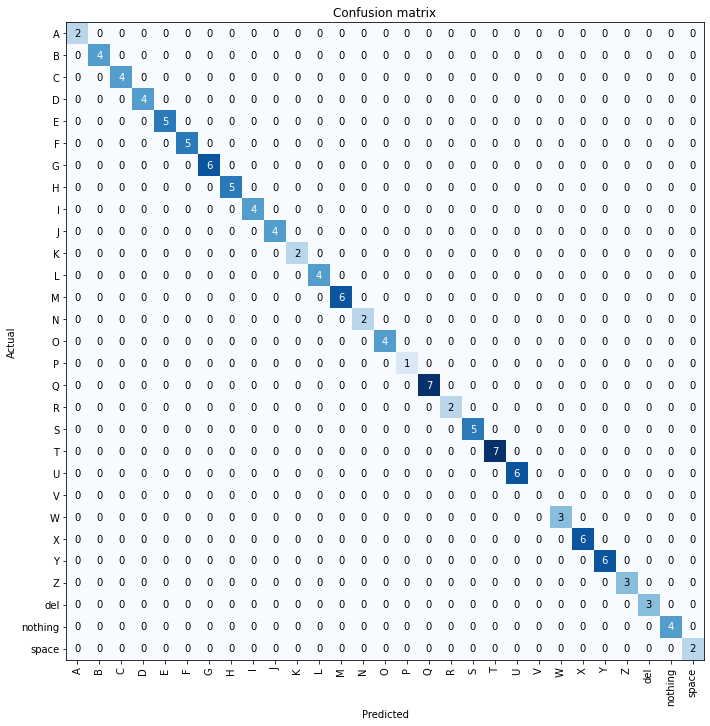

In [69]:
interp.plot_confusion_matrix(figsize=(10,10))

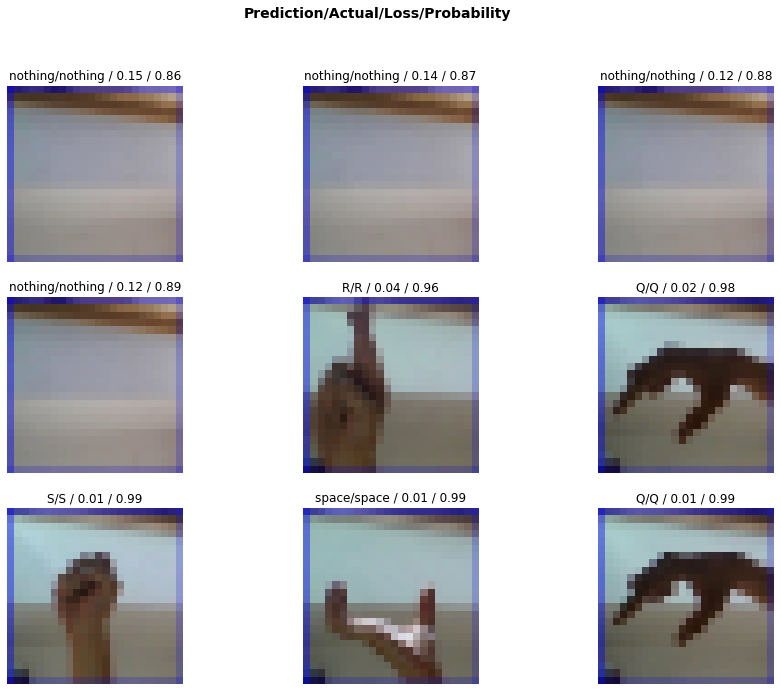

In [70]:
interp.plot_top_losses(9, figsize=(15,11))